<a href="https://colab.research.google.com/github/AHajibalayev/Statistical-Machine-Learning/blob/main/PCA_Ahmadagha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## I **Digits recognition**

Now, we consider an application of digit classification.
We are given a set of handwritten digits in the form of binary images. Each digit is represented as a $8\times 8$ image.

The digits can also be represented as a $8*8 = 64$ dimensional vector, and all images of a given digit are put as rows of a data matrix $X$.

In [ ]:
# Lest look at the data
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import log10, sqrt

The data set consists of 8x8 pixel images stored as 8x8 arrays of grayscale values.

Let's load the data and visualize a few examples

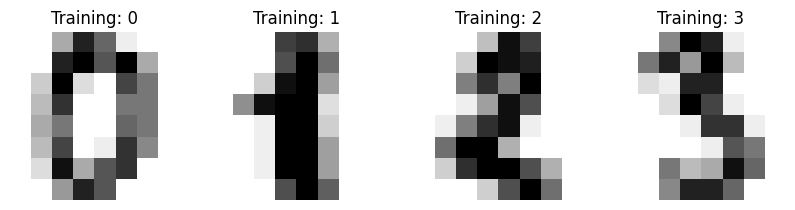

In [ ]:
# loading the data
digits = datasets.load_digits()

# visualization of 4 examples
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)


To classify the data, we first need to reshape each image into a vetcor (of size 64x1).

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print(data.shape)

(1797, 64)


# II **PCA on Digits Data**

Perform PCA analysis of the data matrix $X$ of digit 7.


In [ ]:
# You first need to select all training samples corresponding to digit 7 and store them as a matrix X
target = digits.target
is_digit_7 = target == 7
X = data[is_digit_7]
print("Shape of X (samples of digit 7):", X.shape)

Shape of X (samples of digit 7): (179, 64)


Write a function that returns the first k principal components of a data matrix

NOTE: don't forget to center the data (remove the main from each sample)

In [ ]:
# PCA
# You need to write your own PCA code (using Eigen-decomposition)
def compute_principal_components(X, k):
  '''
  inputs:
     - X: a data matrix of size d x N, where N is the number of samples and d is the dimension of each sample
     - k: the number of principal components to keep
  returns:
    - a matrix P of size d x k that contains the pricipal components as columns
  '''

  # Center the data
  X_centered = X - np.mean(X, axis=0)

  # Compute the covariance matrix
  cov_matrix = np.cov(X_centered.T)

  # Compute the eigenvalues and eigenvectors
  eig_val, eig_vec = np.linalg.eigh(cov_matrix)

  # Sort the eigenvalues and eigenvectors in descending order of eigenvalues
  sorted_idx = np.argsort(eig_val)[::-1]
  sorted_eig_vec = eig_vec[:, sorted_idx]

  # Select the top k eigenvectors (principal components)
  P = sorted_eig_vec[:, :k]

  return P

You can visualize the principal components as images

What can you tell?

In [ ]:
# Projection of the principal components
def project_on_principal_components(X, P):
  '''
    a function the project a data matrix X on the principal components represented as a projection matrix P
    return a matrix Xp a size k x N
    Center the data
  '''
  Xp = np.dot(P.T, X.T)

  return Xp

**Questions**
* show the mean image and the 10 first principal components

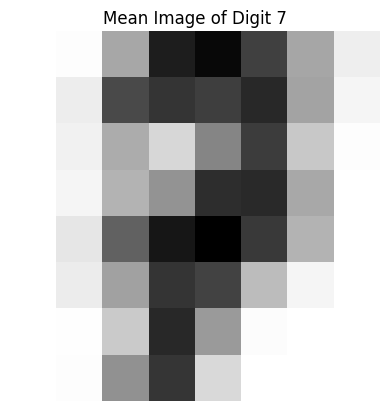

In [ ]:
# Calculate the mean image for digit 7 and visualize it
mean_img = np.mean(X, axis=0)

# Visualization of the mean image
plt.imshow(mean_img.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Mean Image of Digit 7")
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


(64, 10)


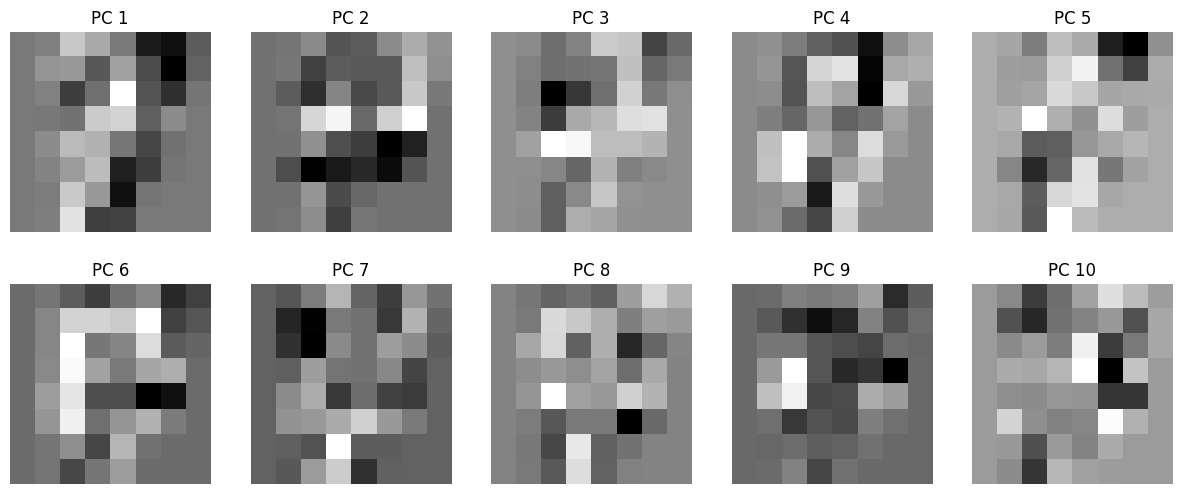

In [ ]:
# Compute the first 10 principal components
P = compute_principal_components(X, 10)
print(P.shape)

# Visualization of the principal components with correction for 10 images in 2 rows and 5 columns
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,6))
for i, ax in zip(range(10), axes.flatten()):
    ax.imshow(P[:, i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"PC {i+1}")
    ax.set_axis_off()

plt.show()

* reconstruct a selected image with different number of principal components,
for example $[1, 5, 10, 20, 30, 50, 64]$.

In [ ]:
# Reconstruction
def reconstruct_from_pcs(P, I):
  '''
  a function that reconstructs a projected image I back to its original size
  inputs:
    - a matrix P of size d x k that contains the pricipal components as columns
    - an image I that was projected onto the principal components, size k x 1
  returns:
    - a reconstructed image of size d x 1
  '''
  reconstructed_image = np.dot(P, I)

  return reconstructed_image

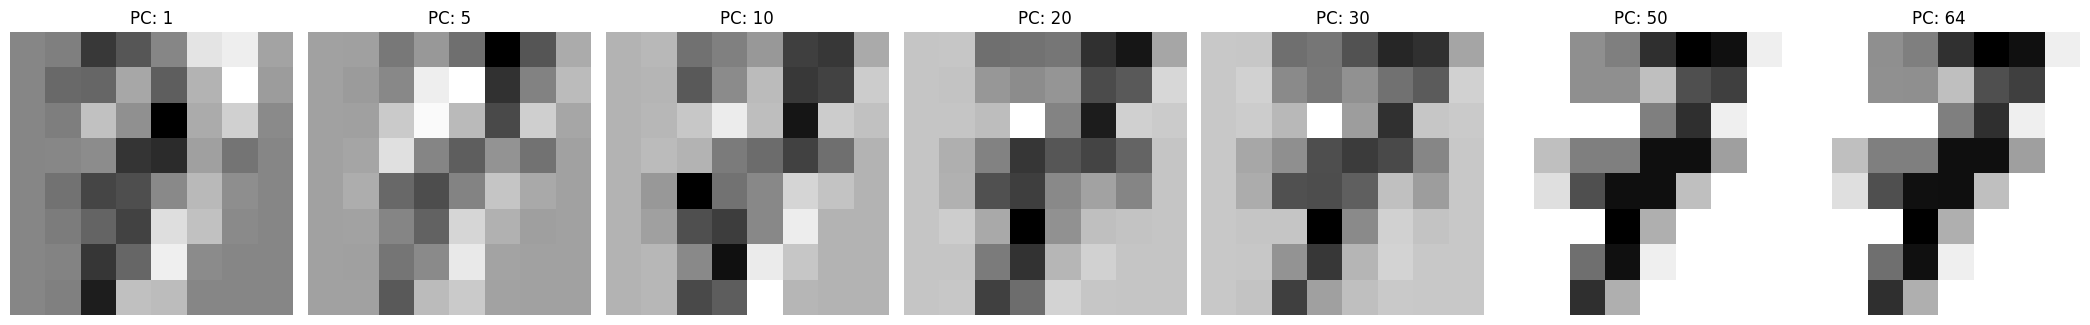

In [ ]:
# Using the digit 7 dataset as the input
idx = 0
img = X[idx:idx+1]  # Ensure it's a 2D array for matrix operations

# Number of principal components to use for the demonstration
components_list = [1, 5, 10, 20, 30, 50, 64]

# Compute all principal components for the demonstration
P_64 = compute_principal_components(X, 64)

# Reconstruct the selected image using different numbers of components
reconstructed_images = []
for k in components_list:
    P_k = P_64[:, :k]
    X_projected = project_on_principal_components(img, P_k)
    # print(X_projected.shape)
    reconstructed_image = reconstruct_from_pcs(P_k, X_projected)
    reconstructed_images.append(reconstructed_image.reshape(8, 8))

# Visualization of the corrected reconstructed images
fig, axes = plt.subplots(1, len(components_list), figsize=(21, 8))
for ax, img, k in zip(axes, reconstructed_images, components_list):
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"PC: {k}")
    ax.axis('off')

plt.tight_layout()
plt.show()

* show the reconstructed image and compute the PSNR values.


In [ ]:
def calculate_psnr(original, reconstructed):
    mse = mean_squared_error(original, reconstructed)
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
idx = 0
img = X[idx:idx+1]  # Ensure it's a 2D array for matrix operations

# Number of principal components to use for the demonstration
components_list = [1, 5, 10, 20, 30, 50, 64]
P_64 = compute_principal_components(X, 64)
psnr = []

for k in components_list:
    P_k = P_64[:, :k]
    X_projected = project_on_principal_components(img, P_k)
    reconstructed_image = reconstruct_from_pcs(P_k, X_projected)
    reconstructed_images.append(reconstructed_image.reshape(8, 8))
    psnr.append(calculate_psnr(img.flatten(), reconstructed_image.flatten()))

for components, psnr_value in zip(components_list, psnr):
    print(f"PSNR = {psnr_value}, with {components} principal components")


PSNR = 30.947466989576, with 1 principal components
PSNR = 32.6187825219562, with 5 principal components
PSNR = 35.94787819665849, with 10 principal components
PSNR = 40.78712650460339, with 20 principal components
PSNR = 43.175059086351325, with 30 principal components
PSNR = 320.871623944517, with 50 principal components
PSNR = 326.1765240626829, with 64 principal components



* plot the evolution of the PSNR as a function of the number of principal components used.

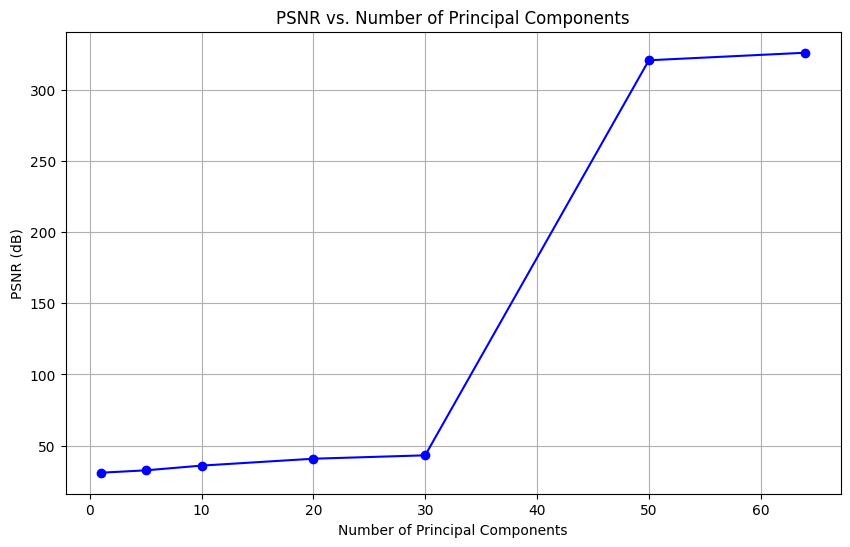

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(components_list, psnr, marker='o', linestyle='-', color='b')
plt.title('PSNR vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('PSNR (dB)')
plt.grid(True)
plt.show()

**Comment:** The graph presents a plot of PSNR (Peak Signal-to-Noise Ratio) values against the number of principal components used. When the principal components approachs 50, the PSNR dramatically rises, indicating a notable improvement in image quality. The PSNR values plateau after this point, indicating that adding more than 50 primary components does not significantly improve the quality of the image. This could indicate that, in order to capture the most important aspects of the image data without significantly losing information, a PCA with about 50 components is best suited for this specific image compression assignment.

## III **Digits classification**
Now, we want to classify different digits using a nearest neighbour (NN) classifier.

*Nearest neighbour classifier*

NN is the simplest classifier we can construct.
Assume we have a set of training examples $\mathcal{D}=\{\mathbf{x}^n, c^n\}$, $n=1, \ldots, N$, where $\mathbf{x}^n$ is an input vector and $c^n$ its corresponding class label ($c^n \in (1, \ldots, C)$).

The strategy of a NN classifier is as follows: *for novel input $\mathbf{x}$, find the nearest input in the train set and use the class of this nearest input*.

For example, if we have in our training set only digits 1 and 7, for a new image (not in the training set) whose class is unknown, we find the image $\mathbf{x}^{*}$ in the training set which is the most similar to the input, this is the nearest neighbour, and assign the label of $\mathbf{x}^{*}$ (which is 1 or 7 in our example) to the input image.

For vectors $\mathbf{x}$ and $\mathbf{y}$ representing two different datapoints, we measure `nearness' using a dissimilarity function $d(\mathbf{x}, \mathbf{y})$.
A common dissimilarity is the squared Euclidean distance
$$
d(\mathbf{x}, \mathbf{y}) = (\mathbf{x}- \mathbf{y})^T (\mathbf{x}- \mathbf{y}).
$$

We first need to split the data into training and test subsets

In [ ]:
# split the data into 70% training and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, shuffle=False)

print(X_train.shape)
print(X_test.shape)

(1257, 64)
(540, 64)


* Classify each example in $X_{test}$ using a NN classifier and report the classification accuracy.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def nn_classification(X_train, X_test, y_train, y_test):
    clf = KNeighborsClassifier()
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict on test set
    y_pred = clf.predict(X_test)
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    return accuracy

nn_classification(X_train, X_test, y_train, y_test)

96.48148148148148

*  Use PCA to reduce the dimensionality of the problem, i.e. represent each training example as a lower dimensional vector using PCA, and perform classification of the test examples.

* Use different number of principal comonents and show how the classification accuray varies.


In [ ]:
def nn_classification_with_pca(X_train, y_train, X_test, y_test, pca_component):
    """
    Perform classification using a Nearest Neighbors classifier after applying PCA for dimensionality reduction.
    n_components specifies the number of principal components to use.
    """
    # Compute principal components on the training set
    P = compute_principal_components(X_train, pca_component)

    # Project both training and test sets onto the principal components
    X_train_pca = np.dot(X_train - np.mean(X_train, axis=0), P)
    X_test_pca = np.dot(X_test - np.mean(X_train, axis=0), P)

    # Initialize and train the NN classifier
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100

    return accuracy

components_list =  [1, 5, 10, 20, 30, 50, 64]
# Calculate classification accuracy with varying numbers of principal components
pca_accuracy = [nn_classification_with_pca(X_train, y_train, X_test, y_test, k) for k in components_list]
for components, accuracy in zip(components_list, pca_accuracy):
    print(f"Accuracy = {accuracy:.6f} %, with {components} principal components")

Accuracy = 32.407407 %, with 1 principal components
Accuracy = 87.407407 %, with 5 principal components
Accuracy = 94.259259 %, with 10 principal components
Accuracy = 96.296296 %, with 20 principal components
Accuracy = 95.925926 %, with 30 principal components
Accuracy = 96.111111 %, with 50 principal components
Accuracy = 96.111111 %, with 64 principal components


## IV. **Conclusions**
Which conclusions can you draw from the previous experiments?

Show confusion matrices; what are common mistakes?


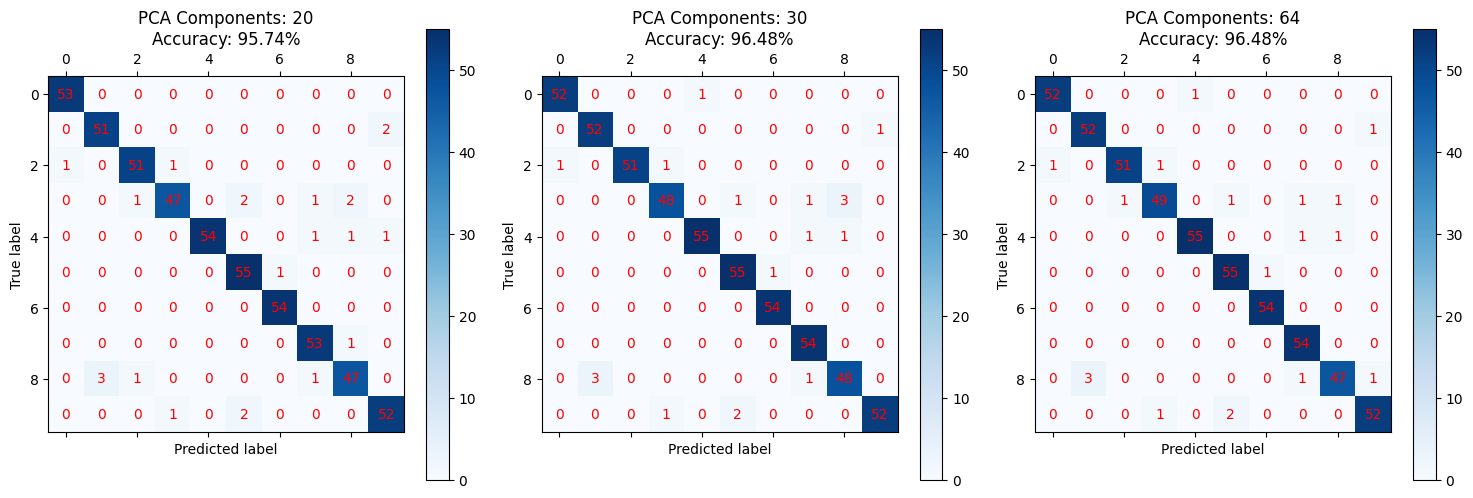

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def nn_classification_with_pca_confusion_matrix(X_train, y_train, X_test, y_test, pca_component):
    """
    Modified the previous version of the nn_classification_with_pca function to return the confusion matrix along with accuracy.
    """
    # Compute principal components on the training set
    P = compute_principal_components(X_train, pca_component)

    # Project
    X_train_pca = np.dot(X_train - np.mean(X_train, axis=0), P)
    X_test_pca = np.dot(X_test - np.mean(X_train, axis=0), P)

    # Initialize and train the NN classifier
    clf = KNeighborsClassifier()
    clf.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, cm

# Selected components for which to draw confusion matrices
pca_components = [20, 30, 64]

# Initialize dictionary to store accuracies and confusion matrices
accuracies = {}

# Adjusting for the dataset feature count limitation
max_features = X_train.shape[1]
confusion_components = [k for k in pca_components if k <= max_features]

# Calculate classification accuracy and confusion matrices
for k in confusion_components:
    accuracies[k] = nn_classification_with_pca_confusion_matrix(X_train, y_train, X_test, y_test, k)

# Plotting the confusion matrices
fig, axes = plt.subplots(1, len(accuracies), figsize=(5 * len(accuracies), 5))
if len(accuracies) == 1:  # Adjusting for the case of a single subplot
    axes = [axes]
for ax, (components, (accuracy, cm)) in zip(axes, accuracies.items()):
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'PCA Components: {components}\nAccuracy: {accuracy:.2f}%')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    # Annotating the confusion matrix with its values
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='red')
plt.tight_layout()
plt.show()


Which conclusions can you draw from the previous experiments?

**Answer**: When we increase the PCA components, the accuracy of the K-Nearest Neighbors classifier also increase slightly which means that the principal components seems to have a positive impact on the classification performance. But according to the accuracy that I calculated in the previous part, when the PCA components reach to 30, indicating that there might be a point of diminishing retuns where adding more components doesn't contribute to a better classification performance because the additional variance captured does not significantly relate to the classification task.

Show confusion matrices; what are common mistakes?

**Answer:** As we can see in the subplot, the diagonal elements of the confusion matrices represent correctly classified images, and off-diagonal elements represent misclassification.

The common mistakes can be identified by the off-diagonal elements:

- Misclassifications are sporadic across various classes, without a dominant error trend. However, certain patterns can be noted. For instance, there are a few instances where the class 8 is misclassified as class 1, and class 9 is sometimes misclassified as class 5 or 7.
- In general, some samples in dataset can be hard to classify between each classes or some samples looks quite similar which leads to be misclassified
